## Introduction

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to **find patterns in the available information**. You want to **understand passenger preferences and the impact of external factors on rides**.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

### Load Library

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### Parse the data from website

In [20]:
URL='https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs={"id": "weather_records"})
heading_table=[]
for row in table.find_all('th'):
    heading_table.append(row.text)   
content=[]
for row in table.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
weather_records = pd.DataFrame(content, columns = heading_table)
display(weather_records)
weather_records.info()

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds
...,...,...,...
692,2017-11-29 20:00:00,281.340,few clouds
693,2017-11-29 21:00:00,281.690,sky is clear
694,2017-11-29 22:00:00,281.070,few clouds
695,2017-11-29 23:00:00,280.060,sky is clear


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date and time  697 non-null    object
 1   Temperature    697 non-null    object
 2   Description    697 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB


## Import the files from SQL result

In [21]:
result1_df = pd.read_csv('/datasets/project_sql_result_01.csv')
result4_df = pd.read_csv('/datasets/project_sql_result_04.csv')
result1_df.info()
result4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [22]:
result1_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [23]:
result4_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [24]:
result1_df.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [25]:
result4_df.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Great! No missing values

In [26]:
result1_df.company_name.nunique()

64

Check duplicate values for both `result1_df` and `result4_df`. We check only the categorical column for each dataframe.

In [27]:
# Find duplicate values in 'company_name' column of result1_df
duplicate_companies = result1_df[result1_df.duplicated('company_name')]

# Find duplicate values in 'dropoff_location_name' column of result4_df
duplicate_locations = result4_df[result4_df.duplicated('dropoff_location_name')]

# Print the duplicate values
print("Duplicate company names:")
print(duplicate_companies)

print("\nDuplicate dropoff locations:")
print(duplicate_locations)

Duplicate company names:
Empty DataFrame
Columns: [company_name, trips_amount]
Index: []

Duplicate dropoff locations:
Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


In [37]:
# Summary statistics for 'average_trips' column in result4_df
result4_trips_stats = result4_df['average_trips'].describe()
print("Summary statistics for average_trips column in result4_df:")
print(result4_trips_stats)

# Summary statistics for 'trips_amount' column in result1_df
result1_trips_stats = result1_df['trips_amount'].describe()
print("\nSummary statistics for trips_amount column in result1_df:")
print(result1_trips_stats)

Summary statistics for average_trips column in result4_df:
count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

Summary statistics for trips_amount column in result1_df:
count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64


### identify the top 10 neighborhoods in terms of drop-offs

In [29]:
top10_neighborhoods = result4_df.sort_values('average_trips', ascending = False).head(10)
top10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Plot Graph

Plot graphs: taxi companies and number of rides

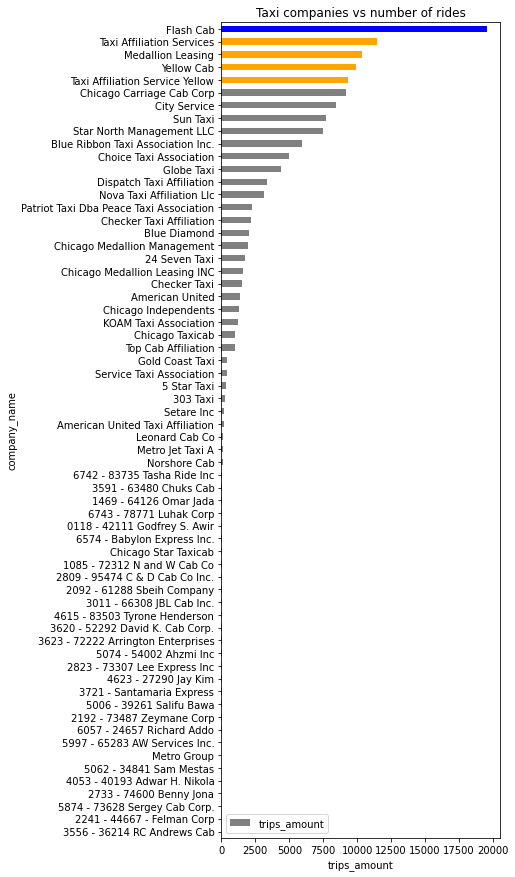

In [30]:
# Plotting the histogram
company_plot = result1_df.sort_values("trips_amount", ascending=True)

# Get the top 5 companies
top_5_companies = company_plot.nlargest(5, "trips_amount")

color_labels = [
    "blue" if company == top_5_companies.iloc[0]["company_name"]
    else "orange" if company in top_5_companies["company_name"].values
    else "grey"
    for company in company_plot["company_name"]
]

company_plot.plot(
    x='company_name', y='trips_amount', kind='barh',
    figsize=(5, 15), color=color_labels
)

# Set labels and title
plt.xlabel('trips_amount')
plt.ylabel('company_name')
plt.title('Taxi companies vs number of rides')

# Display the chart
plt.show()


Findings:
- We can see the top five(5) is Flash Cab, Taxi affiliation Services, Medallion Leasing, Yellow Cab and Taxi affiliation Service Yellow in terms of trips
- Flash Cab score almost double trips amount compare to Taxi affiliation Services. 5 rated star company no?

Plot graphs: top 10 neighborhoods by number of dropoffs

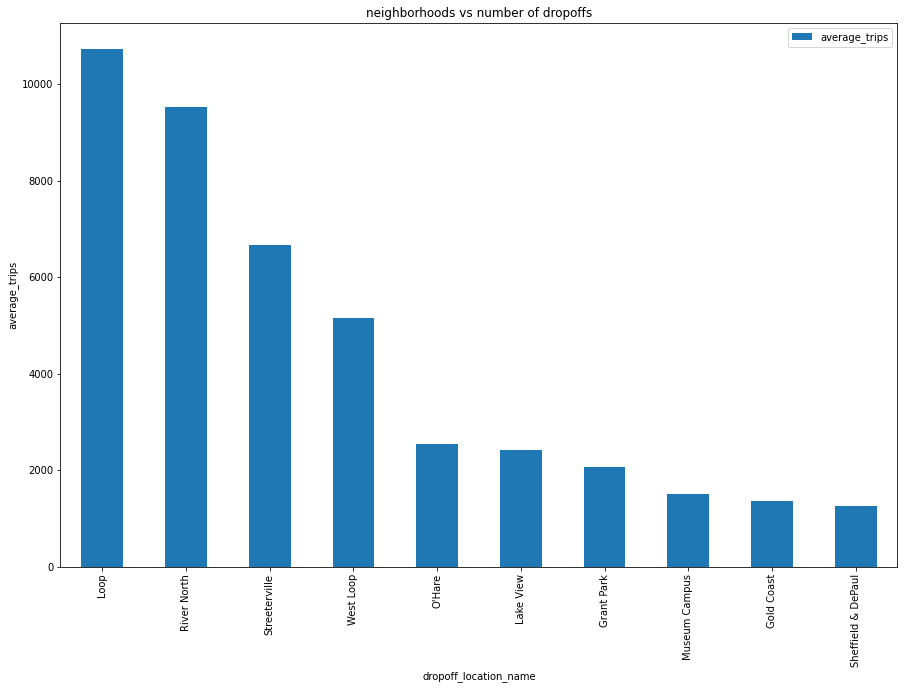

In [35]:
# Plotting the histogram
top10_neighborhoods.plot(x='dropoff_location_name', y='average_trips', kind='bar', figsize = (15,10))

# Set labels and title
plt.xlabel('dropoff_location_name')
plt.ylabel('average_trips')
plt.title('neighborhoods vs number of dropoffs')

# Display the chart
plt.show()

Conclusion:
- Loop has the highest number of dropoff
- O'hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & DePaul has less than 2,500 number of dropoff
- Loop also has almost double number of dropoff than West Loop.
- River North and Streetville score second and third respectively in terms of average number of dropoff.

## Step 5 - Testing hypotheses 

### Load Data

In [12]:
result7_df = pd.read_csv('/datasets/project_sql_result_07.csv')
result7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [13]:
result7_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Test the hypothesis:

The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
We have to format the `start_ts` column to date format. 

In [14]:
result7_df['start_ts'] = pd.to_datetime(result7_df['start_ts'])  # Convert 'start_ts' column to datetime format
result7_df['date'] = result7_df['start_ts'].dt.day_name()  # Create a new column 'date' based on 'start_ts' column

# Print the updated DataFrame
display(result7_df)

,start_ts,weather_conditions,duration_seconds,date
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


Find the mean for `Bad` and `Good` by create each new dataframe.

In [15]:
# Group the 'weather_conditions' column by 'Bad' and calculate the mean of 'duration_seconds'
bad_weather_mean_duration = result7_df[result7_df['weather_conditions'] == 'Bad']['duration_seconds'].mean()

print("Mean duration for bad weather conditions:", bad_weather_mean_duration)

Mean duration for bad weather conditions: 2427.2055555555557


In [16]:
# Group the 'weather_conditions' column by 'Good' and calculate the mean of 'duration_seconds'
good_weather_mean_duration = result7_df[result7_df['weather_conditions'] == 'Good']['duration_seconds'].mean()

print("Mean duration for good weather conditions:", good_weather_mean_duration)

Mean duration for good weather conditions: 1999.6756756756756


We plot a graph for better comparison side by side.

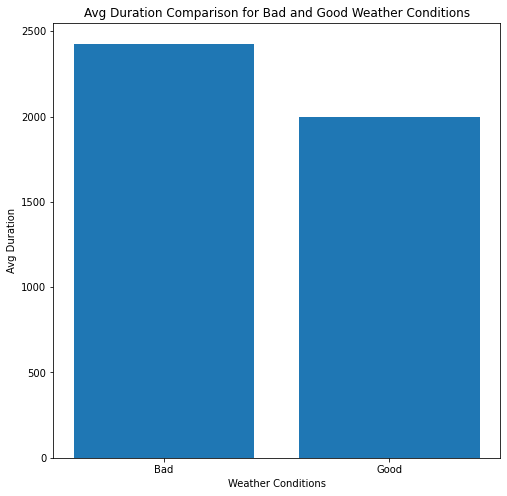

In [17]:
# Create a list of mean durations for each weather condition
mean_durations = [bad_weather_mean_duration, good_weather_mean_duration]

# Define the labels for the histogram bars
labels = ['Bad', 'Good']

# Set the figure size
plt.figure(figsize=(8, 8))

# Create the histogram
plt.bar(labels, mean_durations)

# Add labels and title
plt.xlabel('Weather Conditions')
plt.ylabel('Avg Duration')
plt.title('Avg Duration Comparison for Bad and Good Weather Conditions')

# Display the histogram
plt.show()


We then test this result to see the significance. Since we assume changes on duration during rainy day it will affect the duration of dropoff. Thus hypothesis as below:-
- Null hypothesis (H0): The mean durations for "Bad" and "Good" weather conditions are equal.
- Alternative hypothesis (H1): The mean durations for "Bad" and "Good" weather conditions are not equal.

In [18]:
import scipy.stats as stats

# Assuming two arrays or Series with durations for 'Bad' and 'Good' weather conditions
bad_durations = result7_df[result7_df['weather_conditions'] == 'Bad']['duration_seconds']
good_durations = result7_df[result7_df['weather_conditions'] == 'Good']['duration_seconds']

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(bad_durations, good_durations)

# Set the significance level (alpha)
alpha = 0.05

# Print the test result
if p_value < alpha:
    print("The mean durations for 'Bad' and 'Good' weather conditions are significantly different.")
else:
    print("There is no significant difference in the mean durations for 'Bad' and 'Good' weather conditions.")

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)

The mean durations for 'Bad' and 'Good' weather conditions are significantly different.
t-statistic: 6.946177714041499
p-value: 6.517970327099473e-12


Based on the independent two-sample t-test performed on the durations for "Bad" and "Good" weather conditions, with a significance level of 0.05, the following conclusion can be drawn:

- The mean durations for "Bad" and "Good" weather conditions are significantly different.

- This suggests that the weather conditions have an impact on the duration of the event or activity being measured.